In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colaboratory/wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23000,1.71000,2.43000,15.60000,127,2.80000,3.06000,0.28000,2.29000,5.64000,1.04000,3.92000,1065
1,13.20000,1.78000,2.14000,11.20000,100,2.65000,2.76000,0.26000,1.28000,4.38000,1.05000,3.40000,1050
2,13.16000,2.36000,2.67000,18.60000,101,2.80000,3.24000,0.30000,2.81000,5.68000,1.03000,3.17000,1185
3,14.37000,1.95000,2.50000,16.80000,113,3.85000,3.49000,0.24000,2.18000,7.80000,0.86000,3.45000,1480
4,13.24000,2.59000,2.87000,21.00000,118,2.80000,2.69000,0.39000,1.82000,4.32000,1.04000,2.93000,735


In [ ]:
df.shape

(178, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
  df.duplicated().sum()     

0

In [ ]:
scaler = StandardScaler()

df_sc = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_sc.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000
mean,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000
std,1.00282,1.00282,1.00282,1.00282,1.00282,1.00282,1.00282,1.00282,1.00282,1.00282,1.00282,1.00282,1.00282
min,-2.43424,-1.43298,-3.67916,-2.67102,-2.08826,-2.10725,-1.69597,-1.86823,-2.06903,-1.63429,-2.09473,-1.89505,-1.49319
25%,-0.78824,-0.65875,-0.57212,-0.68914,-0.82442,-0.88547,-0.82754,-0.74014,-0.59728,-0.79510,-0.76756,-0.95225,-0.78464
50%,0.06100,-0.42311,-0.02382,0.00152,-0.12228,0.09596,0.10615,-0.17609,-0.06290,-0.15922,0.03313,0.23773,-0.23372
75%,0.83613,0.66979,0.69811,0.60209,0.50964,0.80900,0.84909,0.60954,0.62918,0.49396,0.71316,0.78859,0.75825
max,2.25977,3.10919,3.15633,3.15451,4.37137,2.53952,3.06283,2.40240,3.48507,3.43543,3.30169,1.96091,2.97147


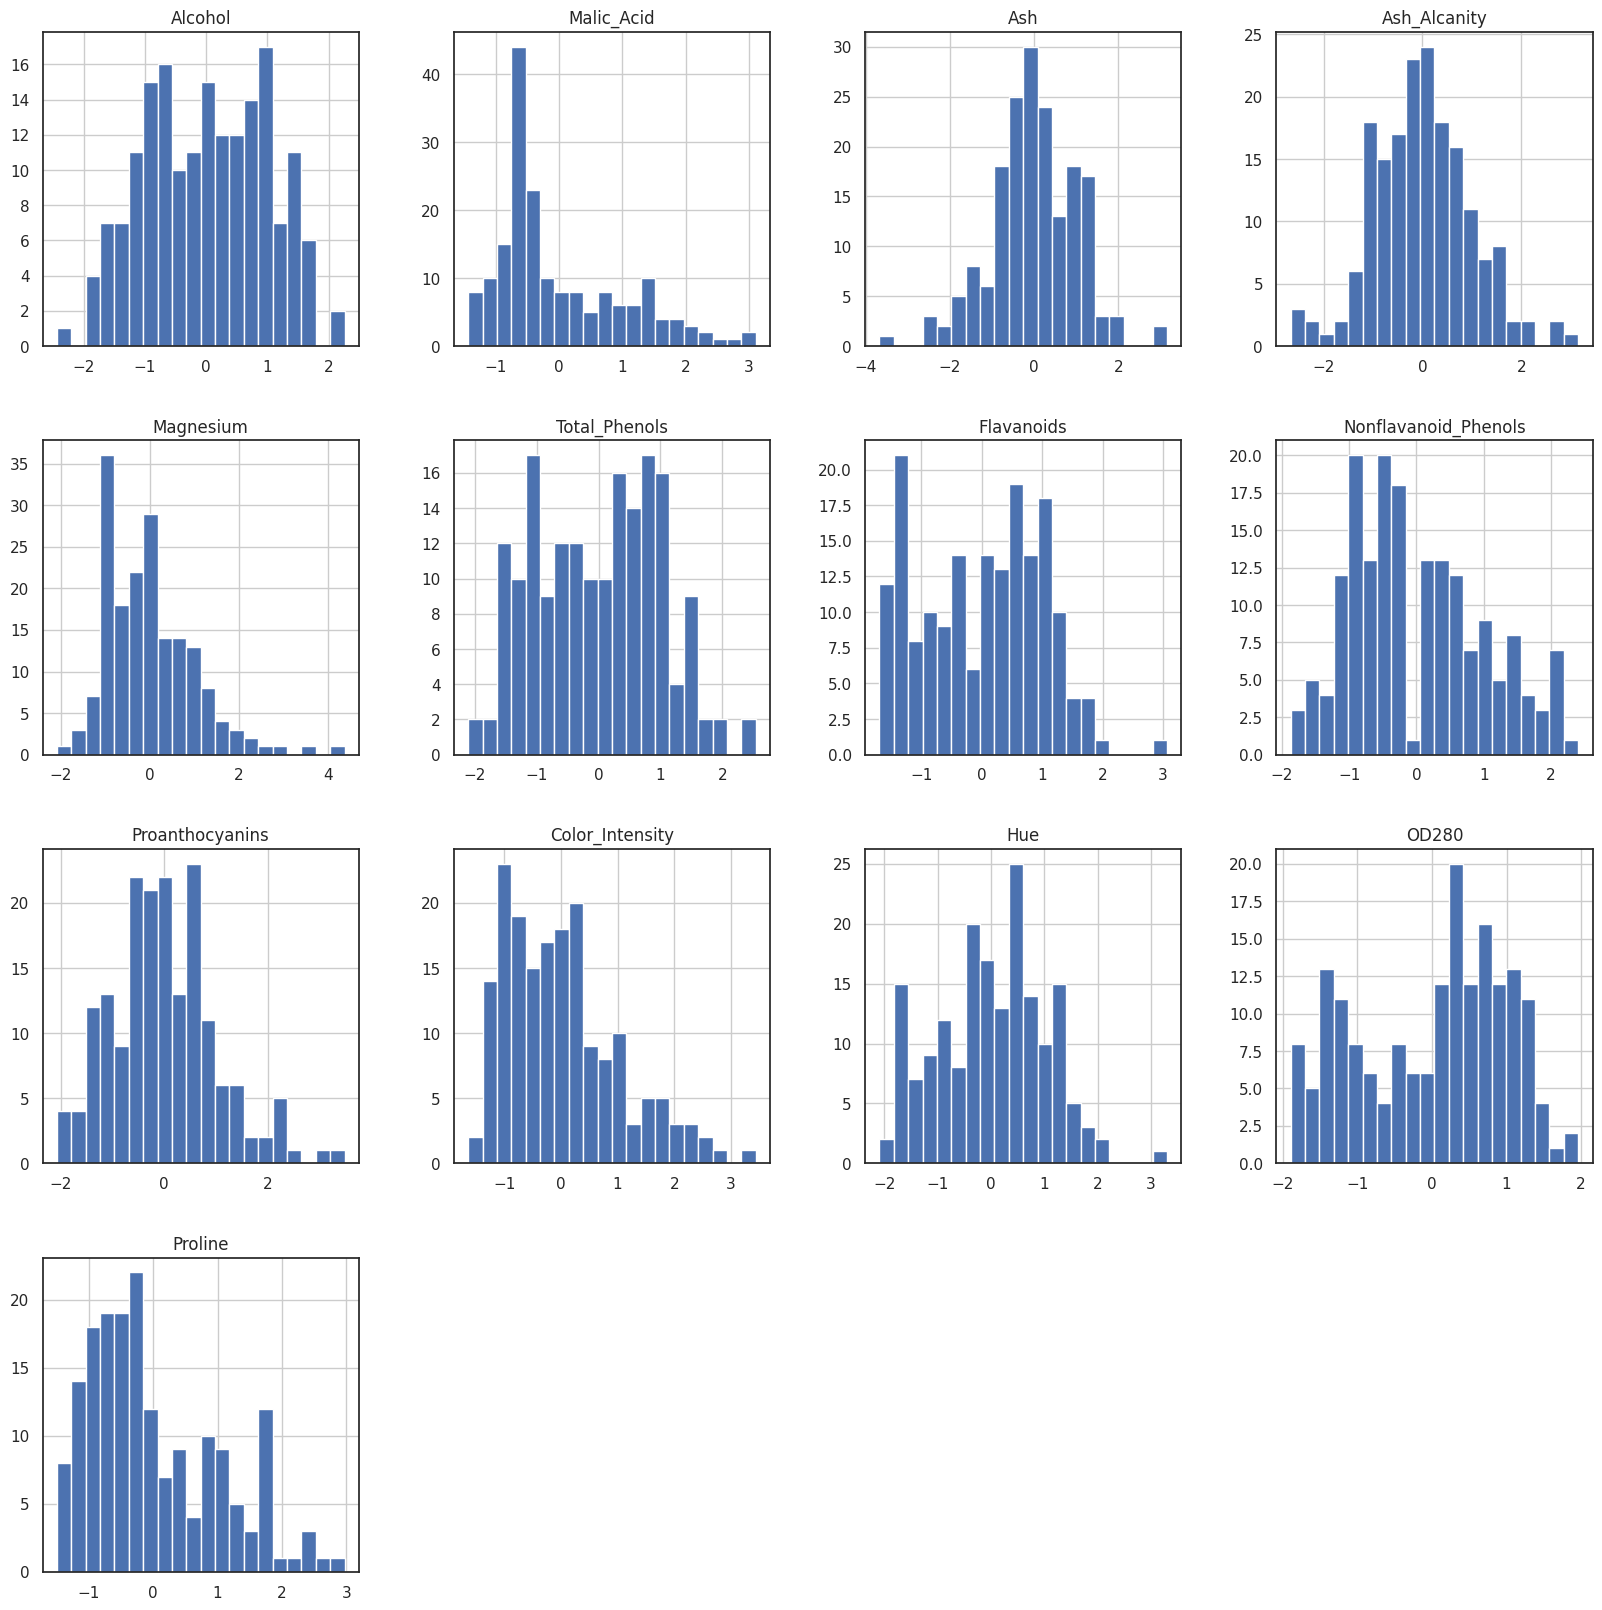

In [ ]:
sns.set(style = 'white', rc = {'figure.figsize' : (20, 20)})
ax = df_sc.hist(bins = 20)

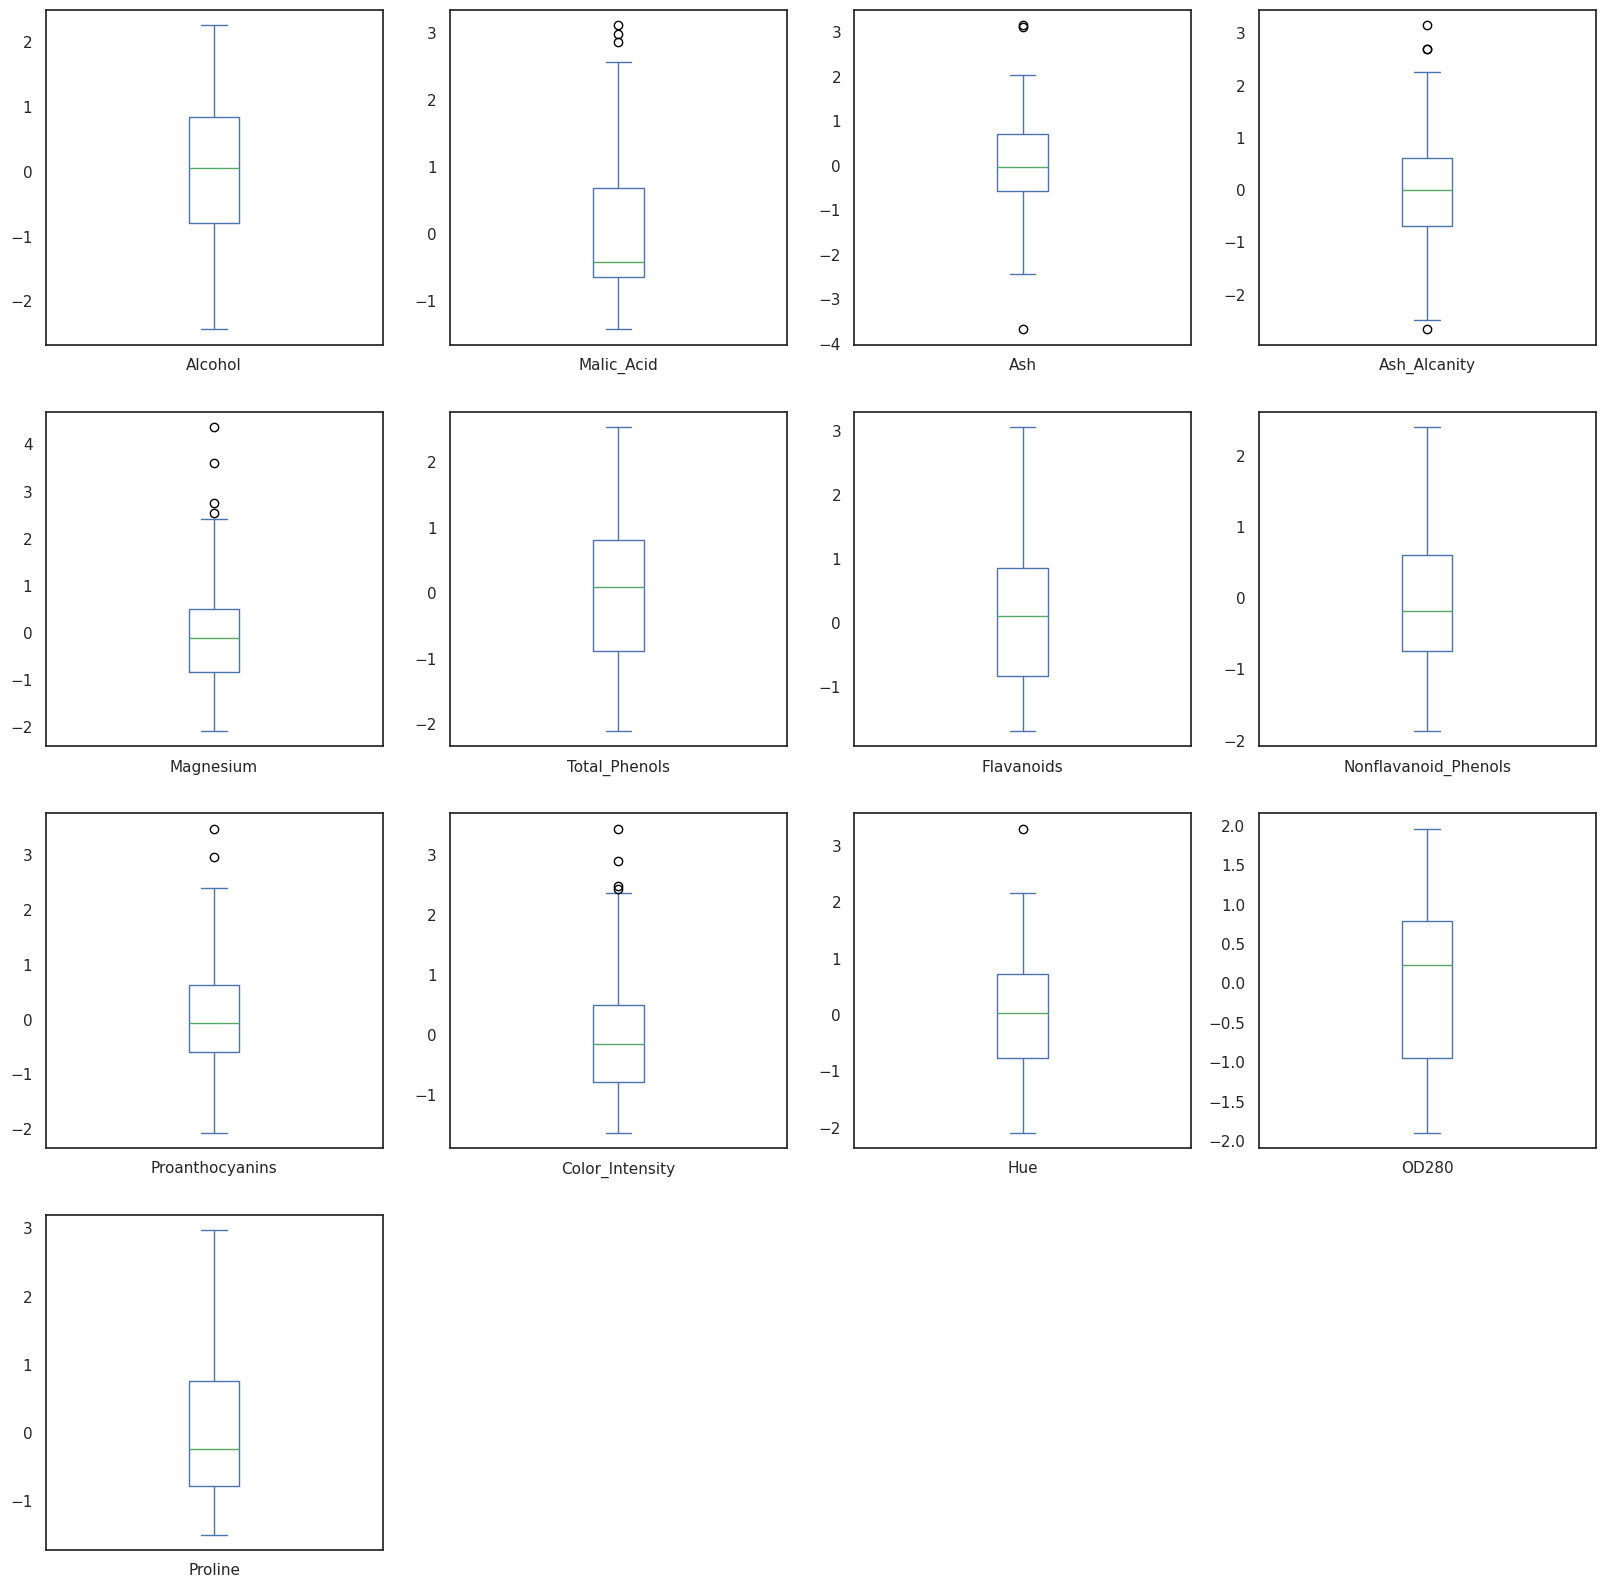

In [ ]:
df_sc.plot(kind = 'box', subplots = True, layout = (4,4))

plt.show()

In [ ]:

for i in df_sc:
  Q1 = df_sc[i].quantile(0.25)
  Q3 = df_sc[i].quantile(0.75)
  IQR = Q3 - Q1

  df_out = df_sc[(df_sc[i] <( Q1 - (1.5 * IQR))) | (df_sc[i] > (Q3 + (1.5 * IQR)))]

# display(df_out)
print("Data Outliers:", df_out.shape[0])

Data Outliers: 0


In [ ]:
df_no_out = df_sc.copy()
for i in df_no_out:
  Q1 = df_no_out[i].quantile(0.25)
  Q3 = df_no_out[i].quantile(0.75)
  IQR = Q3 - Q1
  df_no_out = df_no_out[df_no_out[i] <= (Q3 + (1.5 * IQR))]
  df_no_out = df_no_out[df_no_out[i] >= (Q1 - (1.5 * IQR))]
  # df_no_out = df_no_out.reset_index(drop = True)

display(df_no_out.head())
print('\nBefore remove outliers, the dataaset {}'.format(df_sc.shape[0]))
print('After remove outliers, the dataset {}'.format(df_no_out.shape[0]))

  

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.51861,-0.56225,0.23205,-1.16959,1.91391,0.80900,1.03482,-0.65956,1.22488,0.25172,0.36218,1.84792,1.01301
1,0.24629,-0.49941,-0.82800,-2.49085,0.01815,0.56865,0.73363,-0.82072,-0.54472,-0.29332,0.40605,1.11345,0.96524
2,0.19688,0.02123,1.10933,-0.26874,0.08836,0.80900,1.21553,-0.49841,2.13597,0.26902,0.31830,0.78859,1.39515
3,1.69155,-0.34681,0.48793,-0.80925,0.93092,2.49145,1.46652,-0.98188,1.03215,1.18607,-0.42754,1.18407,2.33457
4,0.29570,0.22769,1.84040,0.45195,1.28199,0.80900,0.66335,0.22680,0.40140,-0.31928,0.36218,0.44960,-0.03787



Before remove outliers, the dataaset 178
After remove outliers, the dataset 161


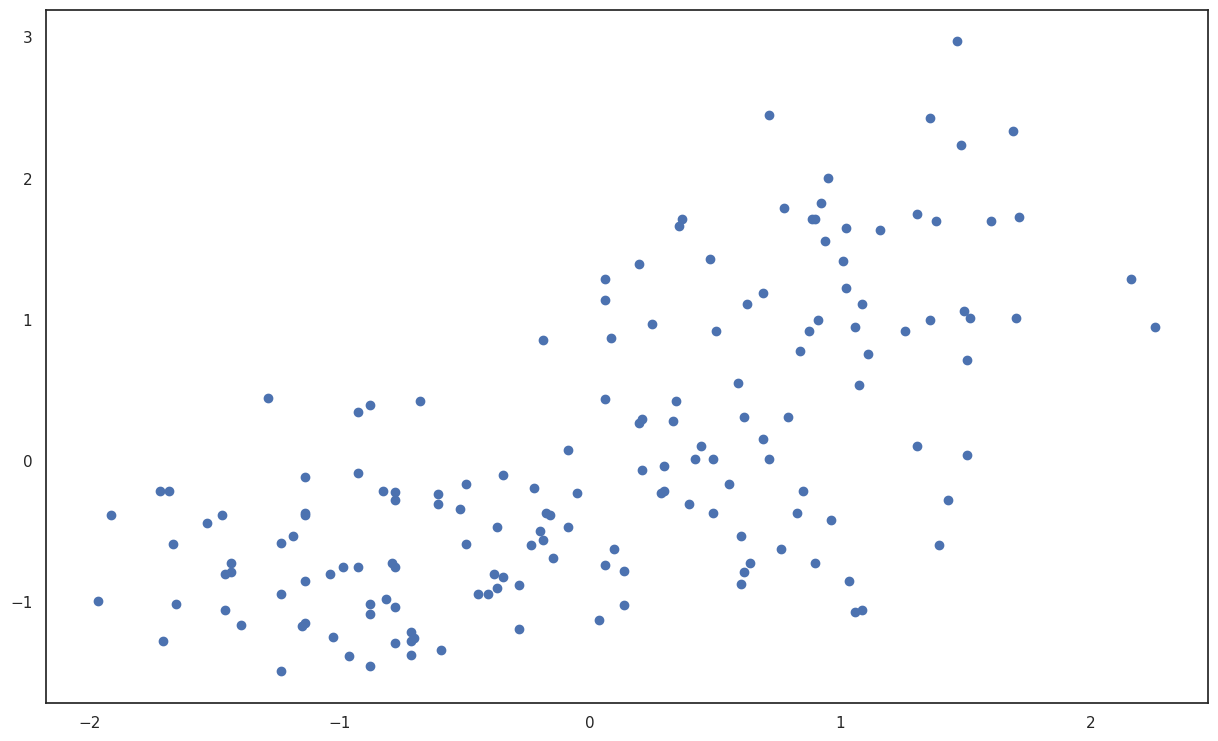

In [ ]:
plt.figure(figsize= (15, 9))
plt.scatter(df_no_out['Alcohol'], df_no_out['Proline'])
plt.show()

In [ ]:
from sklearn.cluster import KMeans
# km.clusters_centers_

X = df_no_out[['Alcohol', 'Proline']].values
inertia = []

for k in range(2, 10):
  km = KMeans(n_clusters= k, init = 'k-means++', max_iter=100, tol = 0.0001, random_state = 42, algorithm= 'elkan')
  km.fit(X)
  inertia.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

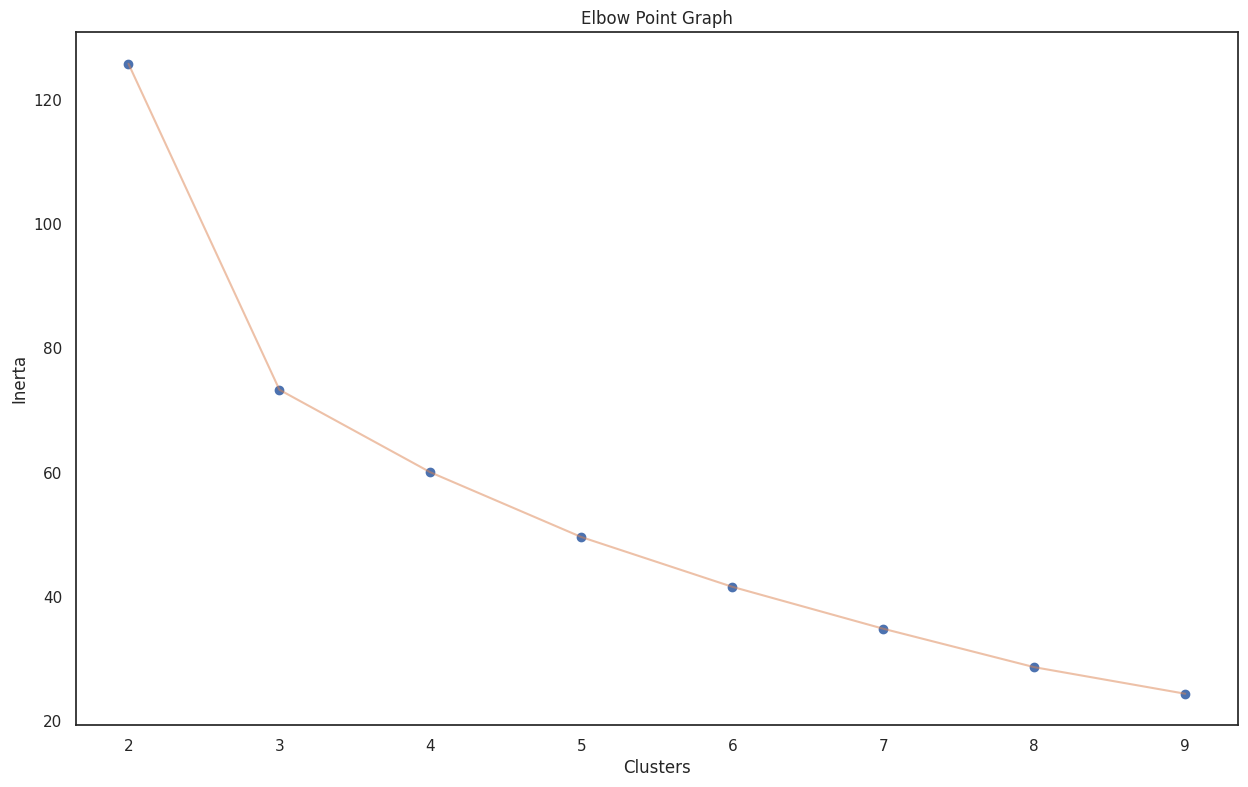

In [ ]:
# plot
plt.figure(figsize = (15, 9))
plt.title('Elbow Point Graph')
plt.plot(np.arange(2, 10), inertia, 'o')
plt.plot(np.arange(2, 10), inertia,  '-', alpha = 0.5)
plt.xlabel('Clusters')
plt.ylabel('Inerta')
plt.show()

# sns.set()
# plt.figure(figsize = (15, 9))
# plt.plot(range, i)
# plt.title('Elbow Point Graph', fontsize = 20)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Sum of Squared Error')
# plt.show()

In [ ]:
# print(km.cluster_centers_)
# print(km.inertia_)
# print(km.n_iter_)

km = KMeans(n_clusters = 3, init = 'k-means++', random_state= 0)
y_pred = km.fit_predict(df_no_out[['Alcohol', 'Proline']])
df_no_out['cluster'] = y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


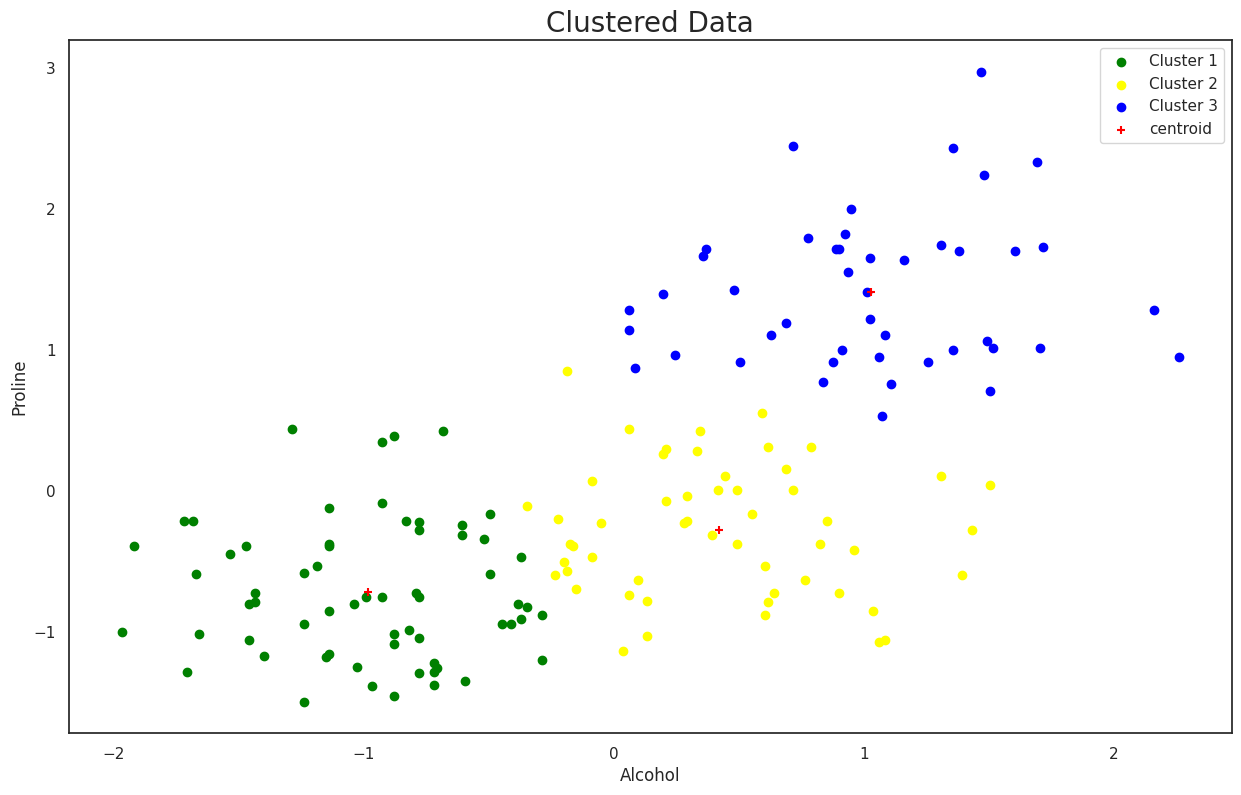

In [ ]:
# kmeans = KMeans(n_clusters = 3, init = 'k-means++', tol = 0.0001, random_state = 0, algorithm='elkan')
# kmeans.fit_predict(X)

# labels = kmeans.labels_
# centroids = kmeans.cluster_centers_

c1 = df_no_out[df_no_out.cluster == 0]
c2 = df_no_out[df_no_out.cluster == 1]
c3 = df_no_out[df_no_out.cluster == 2]

plt.figure(figsize = (15, 9))
plt.scatter(c1.Alcohol, c1['Proline'], c = 'green', label = 'Cluster 1')
plt.scatter(c2.Alcohol, c2['Proline'], c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.Alcohol, c3['Proline'], c = 'blue', label = 'Cluster 3')
plt.title('Clustered Data', fontsize = 20)
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'red', marker = '+', label = 'centroid')
plt.legend()
plt.show()

# plt.figure(figsize = (15, 9))
# plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_, cmap = "Set2_r", s = 25)
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', marker='+', s = 250)
# plt.title('KMeans Clustered Data', fontsize = 16)
# plt.show()

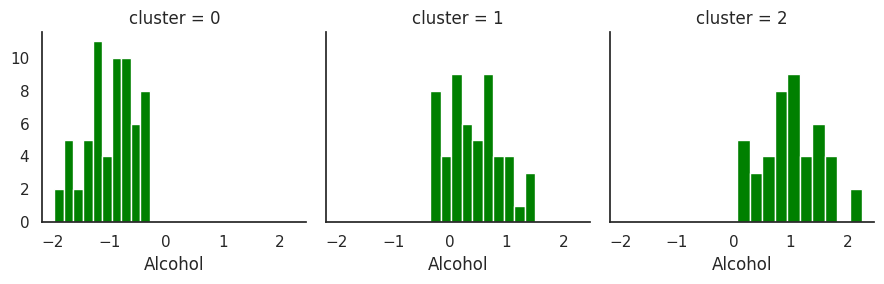

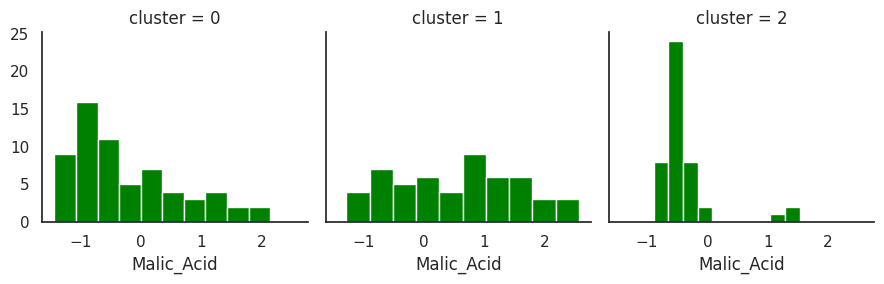

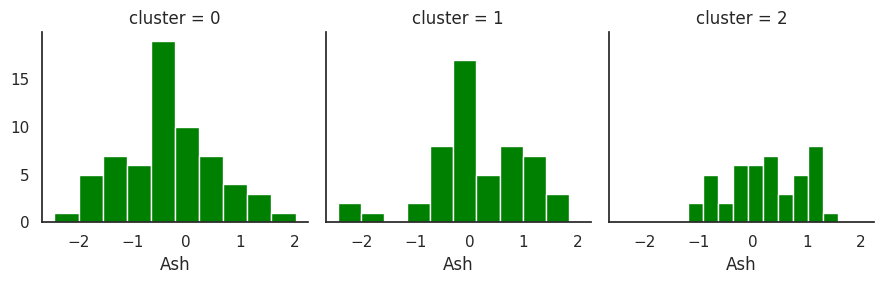

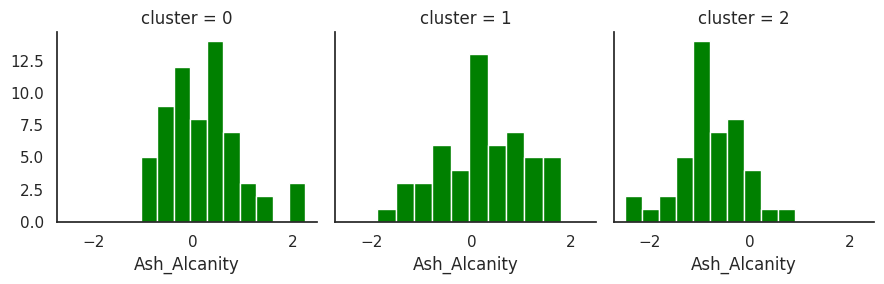

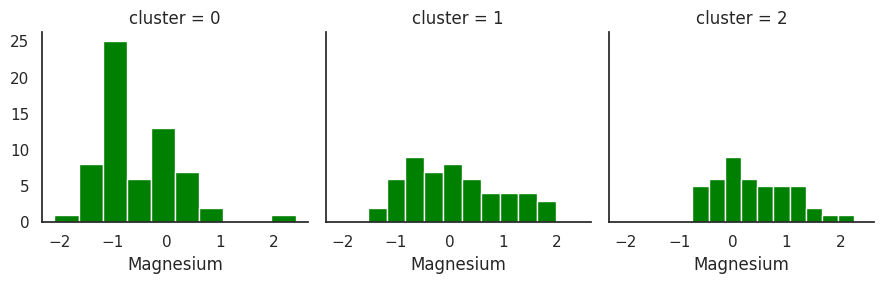

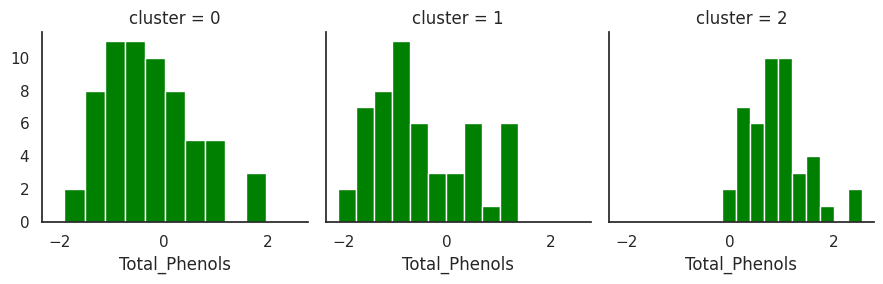

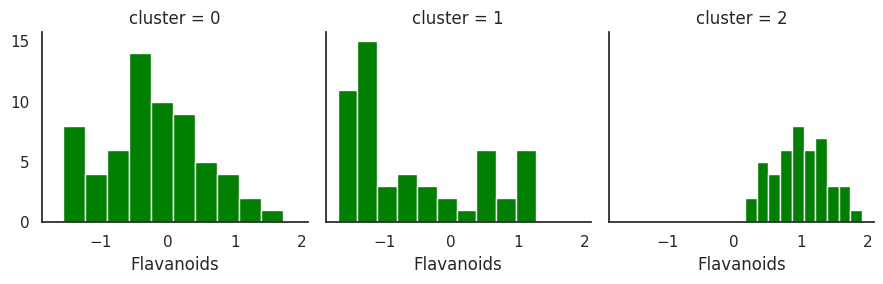

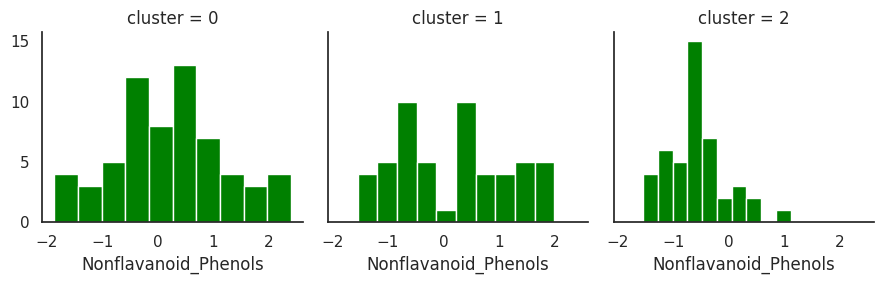

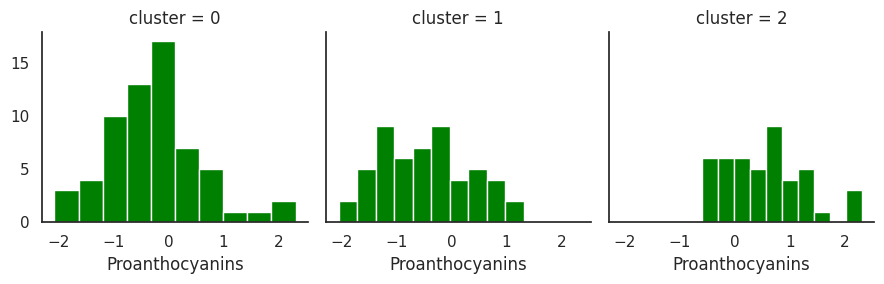

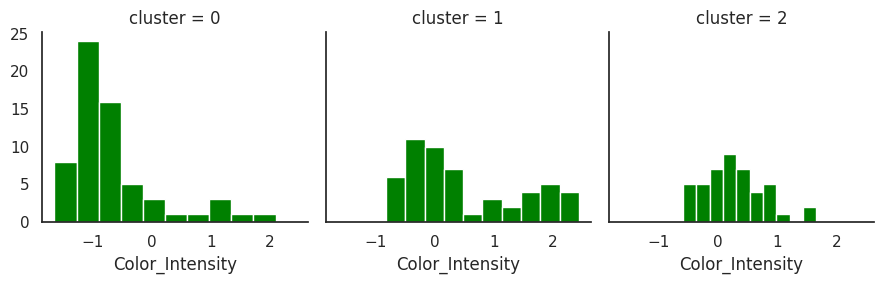

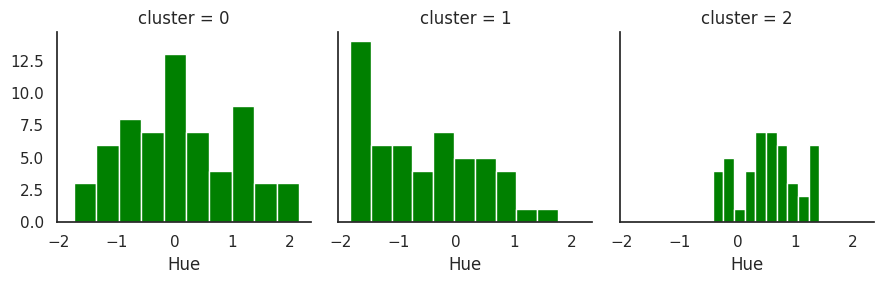

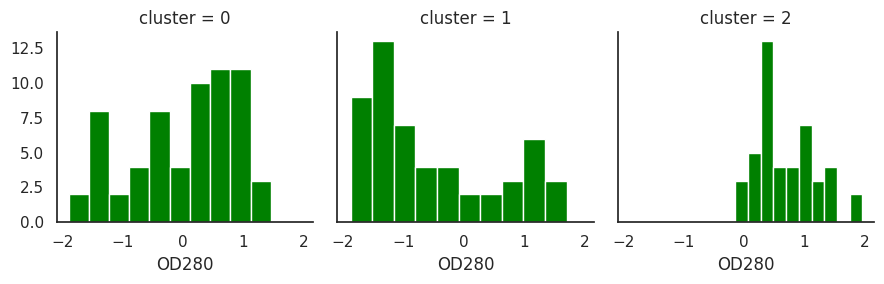

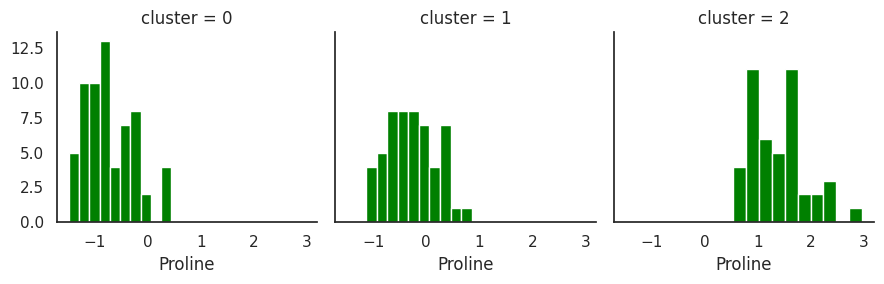

In [ ]:
dff = df_no_out.copy()
dff['cluster'] = y_pred

aux = dff.columns.tolist()
aux[0:len(aux)-1]

sns.set(style = 'white', rc = {'figure.figsize':(15, 9)})
for cluster in aux[0:len(aux)-1]:
  grid = sns.FacetGrid(dff, col = 'cluster')
  grid.map(plt.hist, cluster, color = 'green')

In [ ]:
pca = PCA(n_components=2)

principal_component = pca.fit_transform(df_no_out)
df_pca = pd.DataFrame(principal_component, columns=['principal_component_1', 'principal_component_2'])
df_pca.head()

,principal_component_1,principal_component_2
0,3.58563,-1.13737
1,2.42391,0.15865
2,2.78505,-0.72424
3,4.21883,-2.17239
4,1.04457,-0.54643


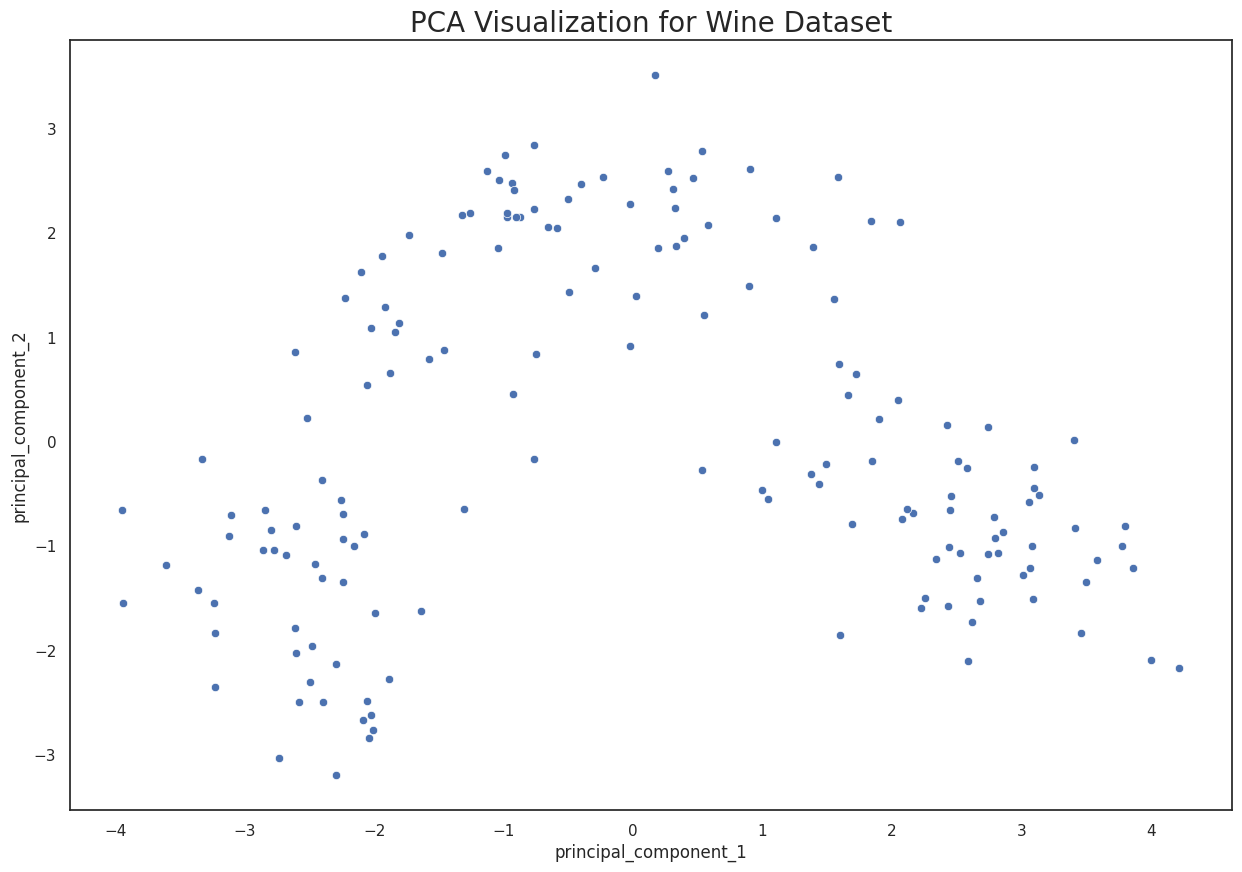

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df_pca, x='principal_component_1', y='principal_component_2')
plt.title('PCA Visualization for Wine Dataset', fontsize=20)
plt.show()

In [ ]:
km_r = KMeans(
    n_clusters=3,
    init="random",
    n_init = 20,
    random_state = 0
)

y_rnd = km_r.fit_predict(df_no_out)

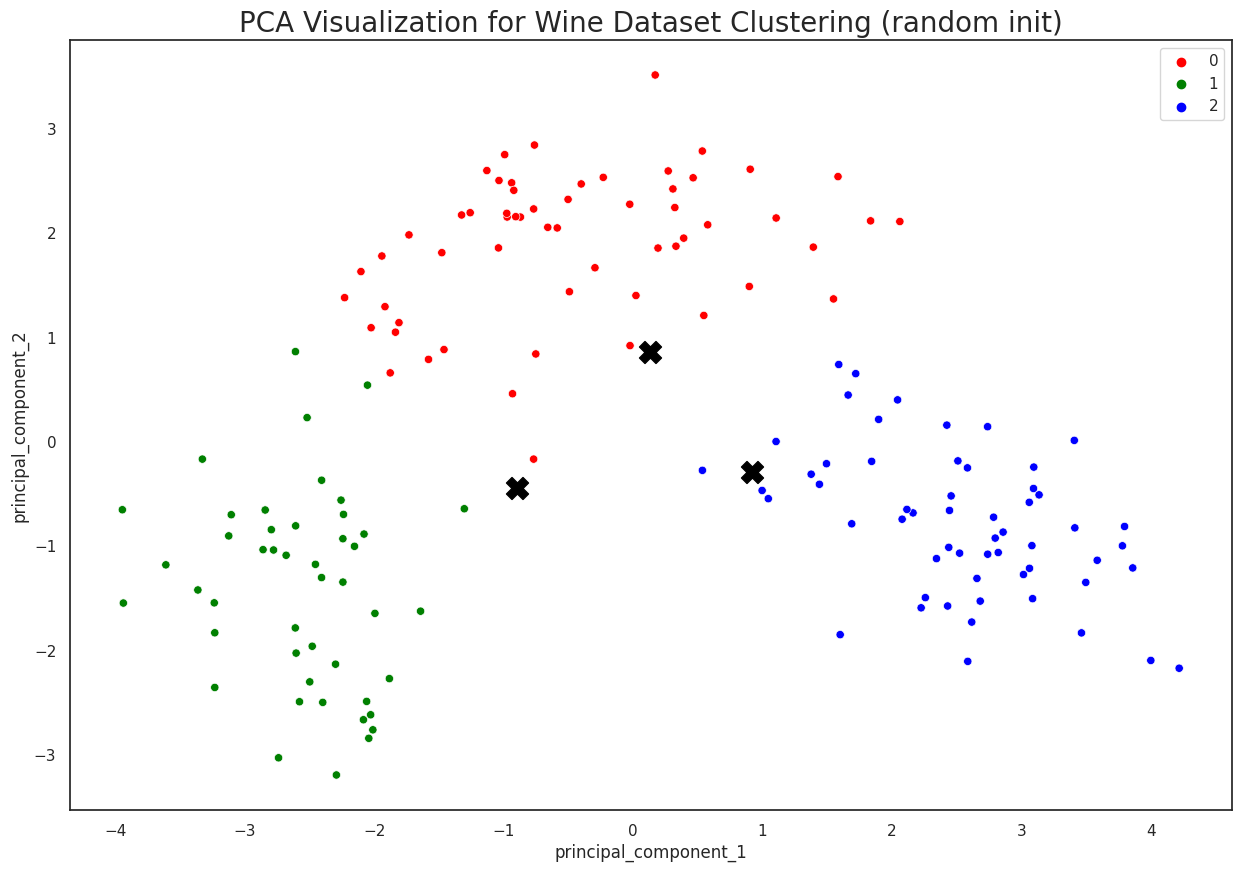

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df_pca, x='principal_component_1', y='principal_component_2', hue=y_rnd, palette=['red', 'green', 'blue'])
plt.scatter(x=km_r.cluster_centers_[:, 0], y=km_r.cluster_centers_[:, 1], marker="X", c="black", label="centroids", s=250)
plt.title('PCA Visualization for Wine Dataset Clustering (random init)', fontsize=20)
plt.show()

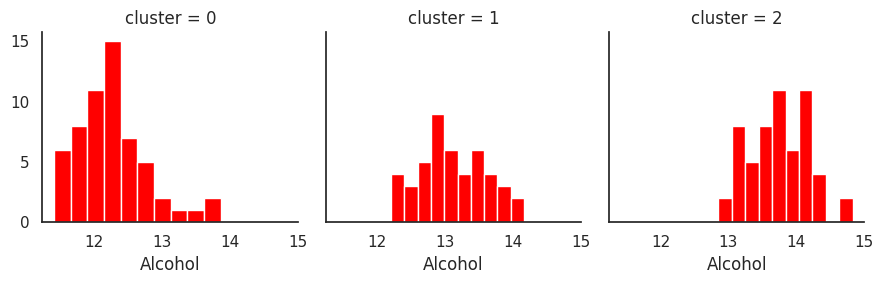

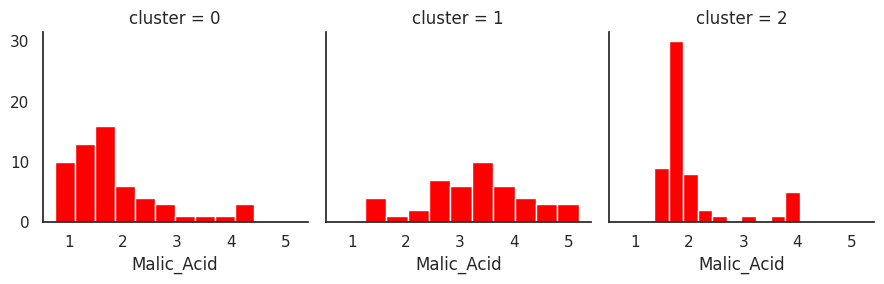

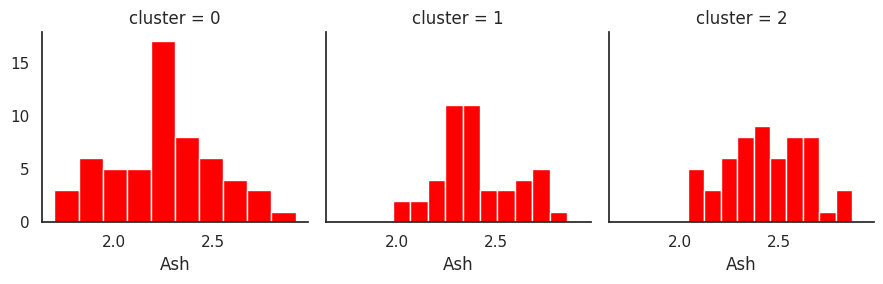

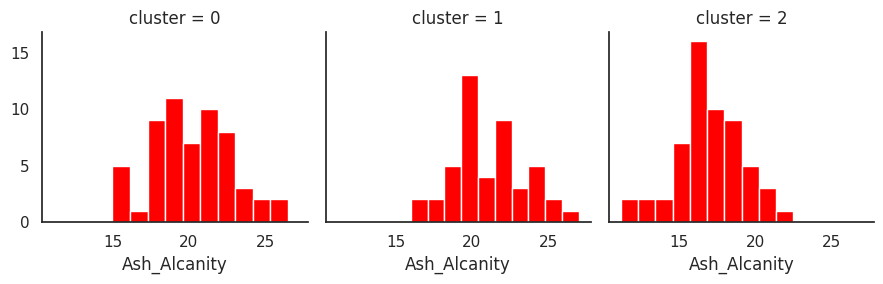

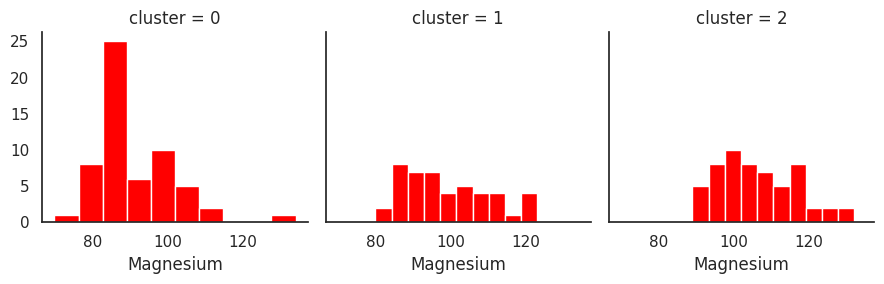

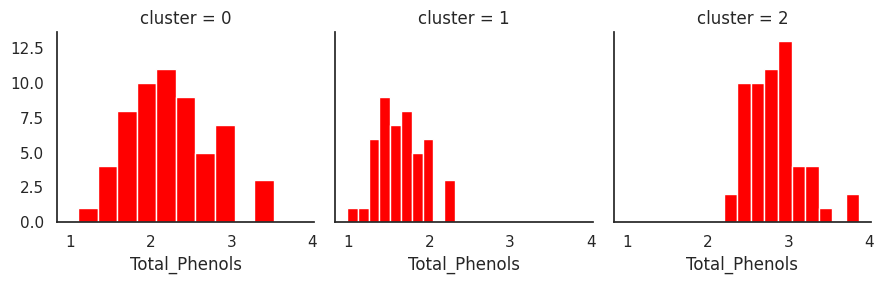

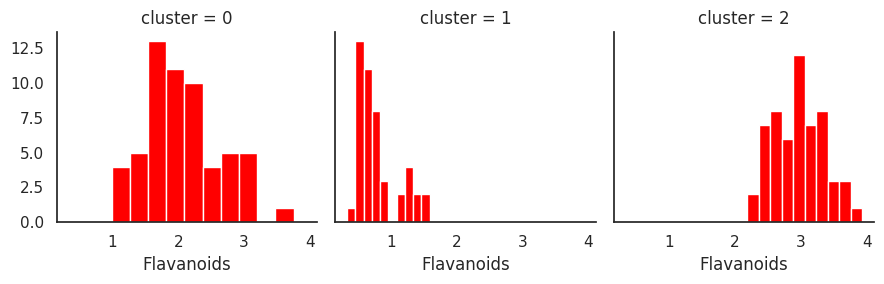

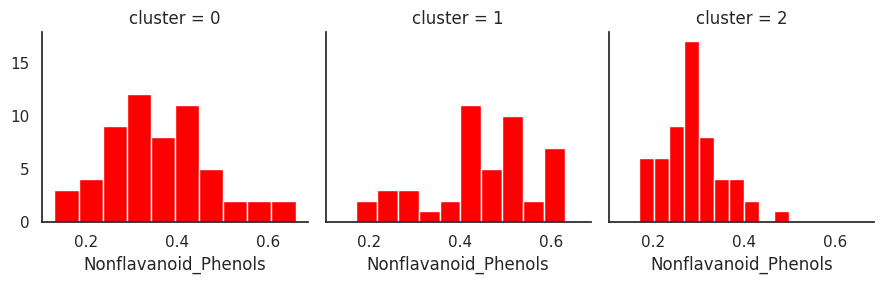

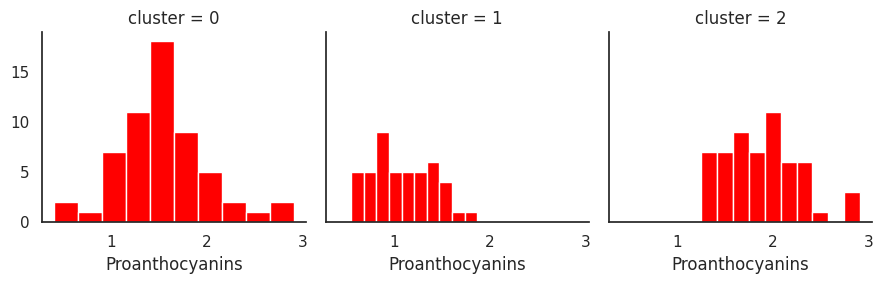

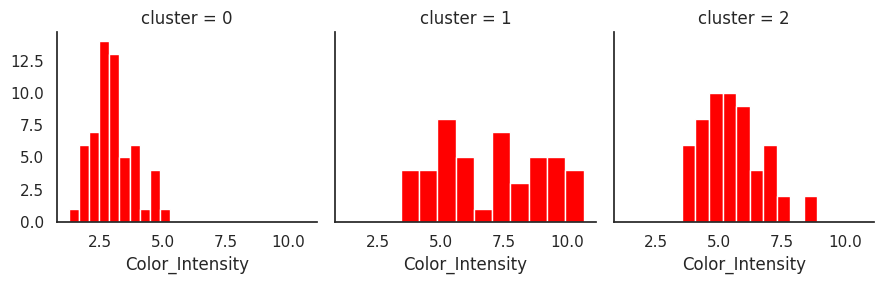

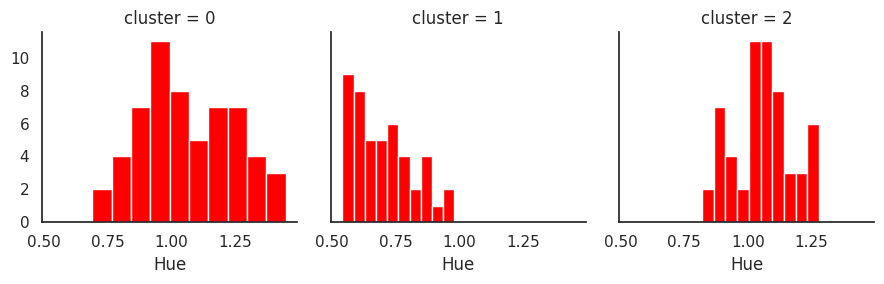

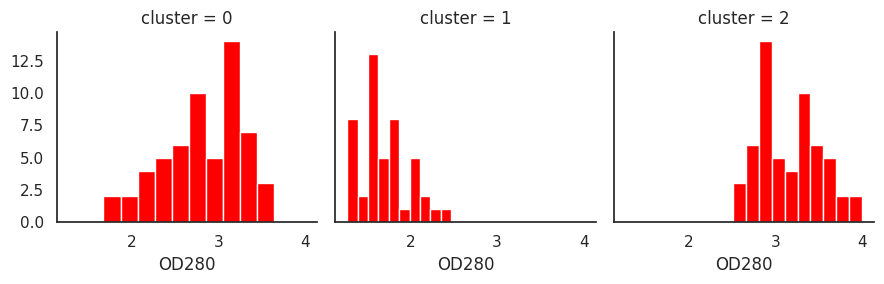

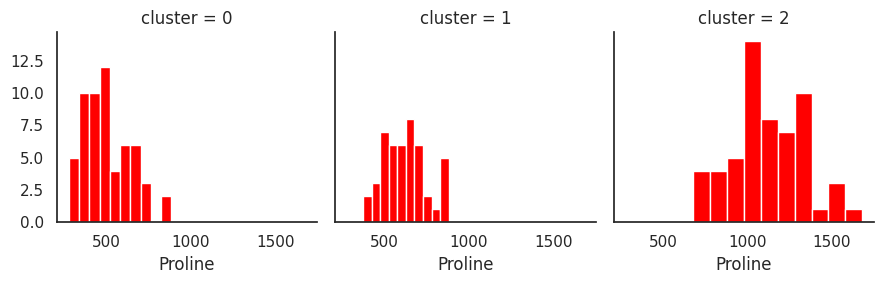

In [ ]:
df_vis = df.loc[df_no_out.index].copy()
df_vis['cluster'] = y_rnd

aux = df_vis.columns.tolist()
aux[0:len(aux)-1]

sns.set(style = 'white', rc = {'figure.figsize':(15, 9)})
for cluster in aux[0:len(aux)-1]:
  grid = sns.FacetGrid(df_vis, col = 'cluster')
  grid.map(plt.hist, cluster, color = 'red')

# **Kesimpulan**
**Cluster 0**:
- Memiliki **alkohol** yang cukup rendah, sebagian besar dibawah 13
- Memiliki **color intensity** yang rendah ( kurang berwarna ) dari 5.0 ke bawah
- Memiliki **total phenols** antara 1 - 4, sebagian besar wine di cluster ini memiliki **total phenols** sekitar 2
- Memiliki **flavanoids** antara 1 - 4, sebagian besar wine di cluster ini memiliki **flavanoids** 2
- Memiliki **nonflavanoid phenols** antara 0.2 - 0.6
- Memiliki **proanthocyanins** antara 0 - 3
- Memiliki **hue** dari 0.75 ke atas
- Memiliki **OD280** di antara 2 - 4
- Memiliki **proline** di bawah 1000

**Cluster 1**:
- Memiliki **alkohol** yang sedang, antara 12 - 14
- Memiliki **color intensity** yang cukup tinggi ( lebih berwarna ) di atas 2.5
- Memiliki **total phenols** yang rendah, dibawah 2
- Memiliki **flavanoids** yang rendah, dibawah 2
- Memiliki **nonflavanoid phenols** antara 0.2 - 0.6
- Memiliki **proanthocyanins** di bawah 2
- Memiliki **hue** di bawah 1.0
- Memiliki **OD280** di bawah 2.5
- Memiliki **proline** di antara 400 - 1000

**Cluster 2**:
- Memiliki **alkohol** yang cukup tinggi, diatas 13
- Memiliki **color intensity** yang sedang ( cukup berwarna ) di antara 2.5 - 8
- Memiliki **total phenols** yang tinggi, diatas 2
- Memiliki **flavanoids** yang tinggi, diatas 2
- Memiliki **nonflavanoid phenols** di bawah 0.4
- Memiliki **proanthocyanins** di atas 1.1
- Memiliki **hue** di atas 0.75
- Memiliki **OD280** di atas 2.5
- Memiliki **proline** di atas 600